<a href="https://colab.research.google.com/github/tomdaler/Machine-Learning/blob/main/Deep%20Learning/CNN_28x28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TURN ON GPU

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#LOAD DATA
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# 28x28 = 784
#SI ES GRIS     28,28,1
#SI ES COLOR    28,28,3
#SI ES AMPLITUD 28,28,4


In [ ]:
from tensorflow.keras import regularizers

# 75 layers
# image input 28,28,1
# 3,3  
# MaxPool2d(2,2)   padding stride
# Flatten
# dropout

model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),

  #28 x 28 = 784
   tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
   tf.keras.layers.Dropout(0.2),

   tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
   tf.keras.layers.Dropout(0.2),

   tf.keras.layers.Dense(10, activation = "softmax")
])


In [ ]:
from tensorflow import keras

model.compile(loss='categorical_crossentropy',
            # optimizer='rmsprop',
             optimizer = keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])


from tensorflow.keras.callbacks import Callback

In [ ]:
class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos entrenamiento "+str(epoch))
      self.model.stop_training = True

callback = TrainingCallback()

Epoch 1/40
938/938 [==============================] - 6s 6ms/step - loss: 0.3120 - accuracy: 0.8956
Epoch 2/40
938/938 [==============================] - 5s 5ms/step - loss: 0.2797 - accuracy: 0.9075
Epoch 3/40
938/938 [==============================] - 5s 5ms/step - loss: 0.2569 - accuracy: 0.9179
Epoch 4/40
938/938 [==============================] - 5s 5ms/step - loss: 0.2357 - accuracy: 0.9273
Epoch 5/40
938/938 [==============================] - 5s 5ms/step - loss: 0.2238 - accuracy: 0.9318
Epoch 6/40
938/938 [==============================] - 5s 5ms/step - loss: 0.2117 - accuracy: 0.9381
Epoch 7/40
938/938 [==============================] - 5s 5ms/step - loss: 0.2005 - accuracy: 0.9436
Epoch 8/40
938/938 [==============================] - 5s 5ms/step - loss: 0.1907 - accuracy: 0.9485
Epoch 9/40
938/938 [==============================] - 5s 5ms/step - loss: 0.1799 - accuracy: 0.9536
[0.3187641501426697, 0.9187999963760376]


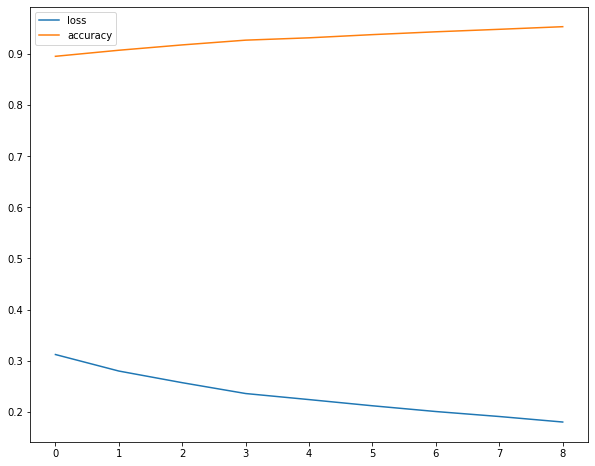

In [ ]:
history=model.fit(train_images,
         train_labels,
         batch_size=64,
         callbacks = [callback],
         epochs=10)

score = model.evaluate(test_images, test_labels, verbose=0)
print(score)


import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,8));

ETA: 0s - loss: 0.1800 - accuracy: 0.9535Lo logramos, nuestro modelo llego a 95%, detenemos entrenamiento 8  <- 8 EPOCHS